## Step 1: Load Data
We start by downloading and loading the dataset `data_ffnn.txt`. The file consists of three columns: `x1`, `x2`, and `y`. This is a multi-class problem.


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = "data_ffnn.txt"  # Ensure this file is in your working directory
data = pd.read_csv(file_path, delim_whitespace=True, header=0, names=['x1', 'x2', 'y'])

# Display the first few rows
print(data.head())


         x1        x2  y
0  0.015546  0.807941  3
1  0.004527  1.426791  3
2  1.358103  1.193950  3
3  1.372911  0.218337  3
4  0.236595  0.281448  3


## Step 2: Plot the Data
Visualize the data in 2D, coloring each point according to its class.


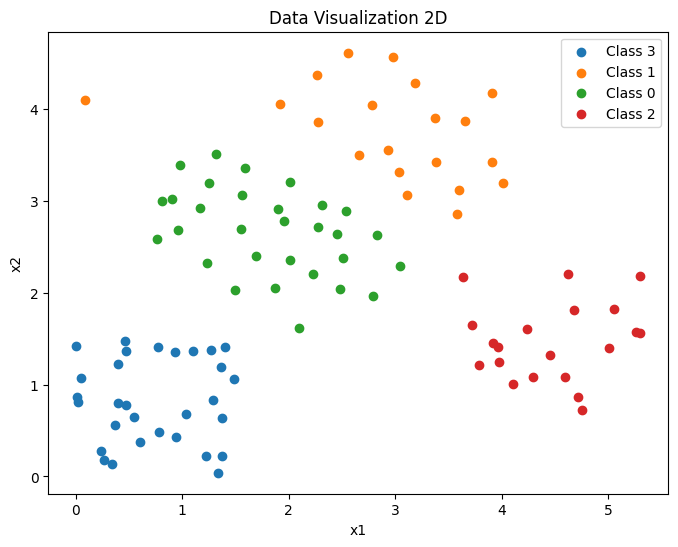

In [46]:

# Plot the data
plt.figure(figsize=(8, 6))
for label in data['y'].unique():
    subset = data[data['y'] == label]
    plt.scatter(subset['x1'], subset['x2'], label=f'Class {label}')
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Visualization 2D')
plt.legend()
plt.show()


## Step 3: Forward Propagation
We implement forward propagation for a feedforward neural network with three layers. The hidden layer will have `K` neurons.


In [47]:
def forward_propagation(X, V, W):
    """
    Perform forward propagation through the neural network.
    
    Parameters:
    -----------
    X : array-like
        Input data of shape (n_samples, n_features)
    V : array-like
        Weight matrix for hidden layer
    W : array-like
        Weight matrix for output layer
    
    Returns:
    --------
    dict
        Dictionary containing:
        - X_bar: Input data with bias term
        - X_bar_bar: Input to hidden layer
        - F: Hidden layer activation
        - F_bar: Hidden layer output with bias
        - F_bar_bar: Input to output layer
        - G: Network output
        - E: Sum of Squared Error
    """
    # Add bias term to input
    X_bar = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Hidden layer
    X_bar_bar = np.dot(X_bar, V)
    F = 1 / (1 + np.exp(-X_bar_bar))  # sigmoid activation
    F_bar = np.hstack((np.ones((F.shape[0], 1)), F))
    F_bar_bar = np.dot(F_bar, W)
    
    # Output layer
    G = 1 / (1 + np.exp(-F_bar_bar))  # Sigmoid activation
    
    # Create one-hot encoded target
    y_true_onehot = np.eye(J)[data['y'].astype(int)]
    
    # calculate error
    E = 0.5 * np.sum((G - y_true_onehot) ** 2)
    
    # Store all intermediate values
    results = {
        'X_bar': X_bar,
        'X_bar_bar': X_bar_bar,
        'F': F,
        'F_bar': F_bar,
        'F_bar_bar': F_bar_bar,
        'G': G,
        'E': E
    }
    
    return results

# Define network parameters
N = 2  # input features
K = 4  # hidden neurons
J = len(data['y'].unique())  # output classes

# Initialize weights
V = np.random.randn(N + 1, K)
W = np.random.randn(K + 1, J)

# Prepare input data
X = data[['x1', 'x2']].values

# Perform forward propagation
results = forward_propagation(X, V, W)

print(f"Error: {results['E']:.4f}")

Error: 62.7503

First few predictions vs actual:
Predicted: 2, Actual: 3
Predicted: 2, Actual: 3
Predicted: 2, Actual: 3
Predicted: 2, Actual: 3
Predicted: 2, Actual: 3


### Affichage des matrices

In [48]:
# Affichage des résultats
def display_matrix(name, matrix):
    """Affiche une matrice avec un nom sous forme de DataFrame."""
    print(f"\n{name}:")
    display(pd.DataFrame(matrix))
    
X_bar = results['X_bar']
X_bar_bar = results['X_bar_bar']
F = results['F']
F_bar = results['F_bar']
F_bar_bar = results['F_bar_bar']
G = results['G']
E = results['E']


# Appeler la fonction d'affichage pour chaque matrice
display_matrix("X (Entrées sans biais)", X[:5])
display_matrix("X_bar (Entrées avec biais)", X_bar[:5])
display_matrix("V (Poids de l'entrée vers la couche cachée)", V[:5])
display_matrix("X_bar_bar (Produit X_bar . V)", X_bar_bar[:5])
display_matrix("F (Sorties de la couche cachée sans biais)", F[:5])
display_matrix("F_bar (Sorties de la couche cachée avec biais)", F_bar[:5])
display_matrix("W (Poids de la couche cachée vers la couche de sortie)", W[:5])
display_matrix("F_bar_bar (Produit F_bar . W)", F_bar_bar[:5])
display_matrix("G (Sorties de la couche de sortie)", G[:5])

# Affichage de l'erreur
print(f"\nE (Erreur SSE): {E}")



X (Entrées sans biais):


,0,1
0,0.015546,0.807941
1,0.004527,1.426791
2,1.358103,1.193950
3,1.372911,0.218337
4,0.236595,0.281448



X_bar (Entrées avec biais):


,0,1,2
0,1.0,0.015546,0.807941
1,1.0,0.004527,1.426791
2,1.0,1.358103,1.193950
3,1.0,1.372911,0.218337
4,1.0,0.236595,0.281448



V (Poids de l'entrée vers la couche cachée):


,0,1,2,3
0,-0.304307,-0.617608,-0.076381,-0.232434
1,-0.310863,-2.524036,0.155856,0.144937
2,-0.709303,2.562814,-0.580691,0.197697



X_bar_bar (Produit X_bar . V):


,0,1,2,3
0,-0.882215,1.413755,-0.543122,-0.070453
1,-1.317741,3.027565,-0.904200,0.050295
2,-1.573363,-0.985636,-0.558029,0.200447
3,-0.885962,-3.523328,0.010809,0.009717
4,-0.577487,-0.493485,-0.202940,-0.142501



F (Sorties de la couche cachée sans biais):


,0,1,2,3
0,0.292719,0.804357,0.367462,0.482394
1,0.211194,0.953804,0.288188,0.512571
2,0.171737,0.271775,0.364004,0.549945
3,0.291944,0.028656,0.502702,0.502429
4,0.359511,0.379073,0.449438,0.464435



F_bar (Sorties de la couche cachée avec biais):


,0,1,2,3,4
0,1.0,0.292719,0.804357,0.367462,0.482394
1,1.0,0.211194,0.953804,0.288188,0.512571
2,1.0,0.171737,0.271775,0.364004,0.549945
3,1.0,0.291944,0.028656,0.502702,0.502429
4,1.0,0.359511,0.379073,0.449438,0.464435



W (Poids de la couche cachée vers la couche de sortie):


,0,1,2,3
0,0.854931,0.226706,0.169344,-0.457244
1,-0.431125,1.819732,1.592245,-0.585768
2,0.206889,0.280125,-0.233745,0.406764
3,0.080425,0.731679,1.345592,0.444980
4,-1.452709,-1.726092,1.544549,-0.709878



F_bar_bar (Produit F_bar . W):


,0,1,2,3
0,0.223921,0.420905,1.686945,-0.480454
1,0.239773,0.204324,1.462145,-0.428607
2,0.067484,-0.067568,1.718483,-0.675713
3,0.045542,0.266571,2.079951,-0.749570
4,0.139820,0.514295,1.975270,-0.643342



G (Sorties de la couche de sortie):


,0,1,2,3
0,0.555747,0.603700,0.843822,0.382145
1,0.559658,0.550904,0.811861,0.394459
2,0.516865,0.483114,0.847933,0.337219
3,0.511383,0.566251,0.888939,0.320915
4,0.534898,0.625813,0.878176,0.344492



E (Erreur SSE): 62.75031859297614
